## Pregunta 1:
### ¿Existe una asociación estadísticamente significativa entre el nivel de escolaridad de la víctima y la tasa de violencia intrafamiliar en Guatemala durante el periodo 2002–2018?

IMPORTACIÓN DE LIBRERÍAS

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sb
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import sklearn.preprocessing
import scipy.cluster.hierarchy as sch
import skfuzzy as fuzz
import pylab
import sklearn.mixture as mixture
import pyclustertend 
import random
from scipy import stats
import seaborn as sns
from scipy.stats import chi2_contingency

CARGA DE ARCHIVOS

In [21]:
df = pd.read_csv('../files/violencia_intrafamiliar_limpio1.csv', encoding="latin1")

print(type(df.columns))

print([col for col in df.columns])

<class 'pandas.core.indexes.base.Index'>
['ANO', 'MES', 'DIA', 'DEPTOMCPIO', 'AREA', 'VIC_SEXO', 'VIC_EDAD', 'VIC_EST_CIV', 'VIC_ESCOLARIDAD', 'VIC_REL_AGR', 'TOTAL_HIJOS', 'AGR_SEXO', 'AGR_EDAD', 'AGR_GRUPET', 'TIPAGRE', 'LEY_APLICABLE', 'RECUR_DENUN']


/var/folders/dc/_dt3fhrs48n2b_4mmncch3440000gp/T/ipykernel_18912/1679516290.py:1: DtypeWarning: Columns (1,3,4,5,7,8,9,11,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../files/violencia_intrafamiliar_limpio1.csv', encoding="latin1")


TABLA DE FRECUENCIAS

In [22]:
tabla_frecuencia = df["VIC_ESCOLARIDAD"].value_counts(normalize=True) * 100
print(tabla_frecuencia)

VIC_ESCOLARIDAD
NINGUNA                               42.536119
PRIMARIA GRADO IGNORADO               10.788164
SEXTO PRIMARIA                        10.118297
DIVESIFICADO GRADO IGNORADO            5.131872
SEXTO DIVERSIFICADO                    4.723003
TERCERO BSICO                          4.551699
TERCERO PRIMARIA                       3.731536
BSICO GRADO IGNORADO                   3.309739
SEGUNDO PRIMARIA                       2.350593
CUARTO PRIMARIA                        1.999095
QUINTO PRIMARIA                        1.581337
QUINTO DIVERSIFICADO                   1.440738
IGNORADO AO Y NIVEL DE ESCOLARIDAD     1.427002
SEGUNDO BSICO                          1.391448
PRIMERO PRIMARIA                       1.161964
GRADO UNIVERSITARIO IGNORADO           1.123986
PRIMERO BSICO                          0.962378
CUARTO DIVERSIFICADO                   0.690068
QUINTO AO UNIVERSITARIO                0.264230
TERCER AO UNIVERSITARIO                0.202010
SEXTO AO UNIVERSITARIO  

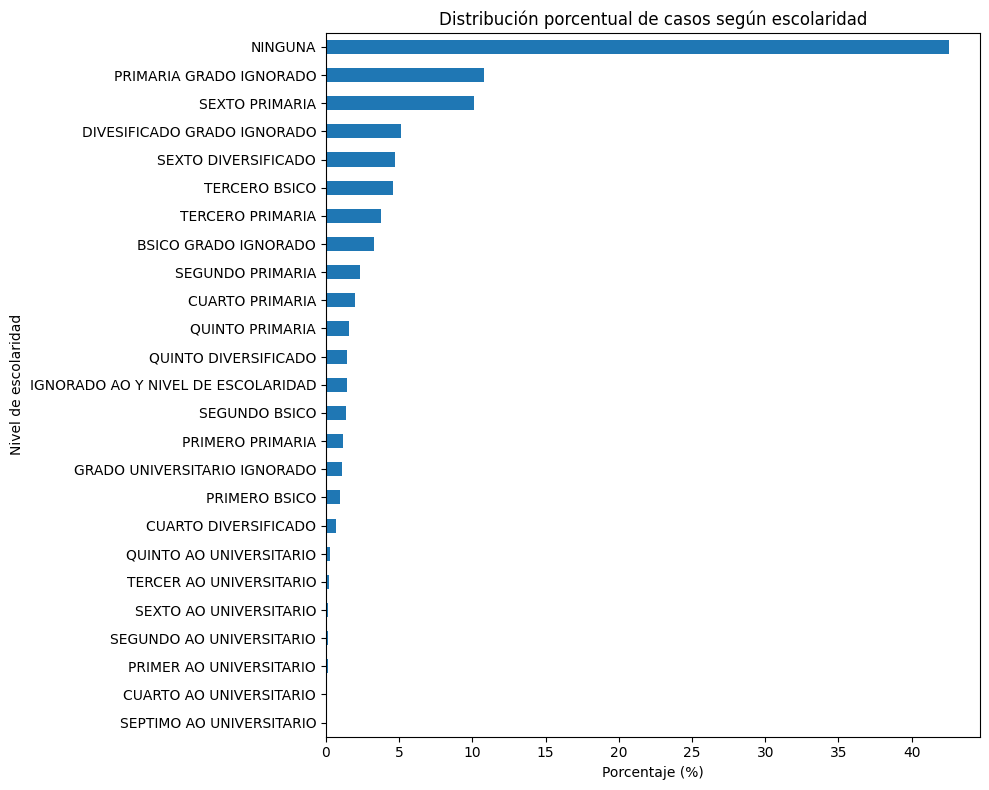

In [27]:
plt.figure(figsize=(10, 8))

tabla_frecuencia.sort_values().plot(kind="barh")

plt.title("Distribución porcentual de casos según escolaridad")
plt.xlabel("Porcentaje (%)")
plt.ylabel("Nivel de escolaridad")

plt.tight_layout()
plt.show()


ESC_GRUPO
BAJA     79.480106
MEDIA    18.267194
ALTA      2.252700
Name: proportion, dtype: float64


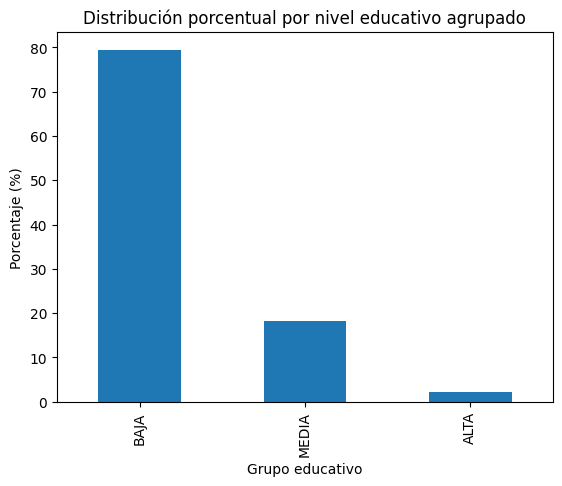

In [26]:
def clasificar_escolaridad(valor):
    if pd.isna(valor):
        return pd.NA

    if "PRIMARIA" in valor:
        return "BAJA"
    
    if "BSICO" in valor or "BASICO" in valor or "DIVERSIFICADO" in valor:
        return "MEDIA"
    
    if "UNIVERSITARIO" in valor:
        return "ALTA"
    
    if "NINGUNA" in valor:
        return "BAJA"
    
    return pd.NA

df["ESC_GRUPO"] = df["VIC_ESCOLARIDAD"].apply(clasificar_escolaridad)

tabla_grupos = df["ESC_GRUPO"].value_counts(normalize=True) * 100
print(tabla_grupos)

plt.figure()
tabla_grupos.plot(kind="bar")
plt.title("Distribución porcentual por nivel educativo agrupado")
plt.ylabel("Porcentaje (%)")
plt.xlabel("Grupo educativo")
plt.show()

In [30]:
df = df[
    (df["ANO"] >= 2002) & 
    (df["ANO"] <= 2018)
]

tabla_anual = pd.crosstab(
    df["ANO"],
    df["ESC_GRUPO"],
    normalize="index"
) * 100

print(tabla_anual)


ESC_GRUPO      ALTA        BAJA      MEDIA
ANO                                       
2002.0     0.000000   71.428571  28.571429
2003.0     0.000000   87.500000  12.500000
2004.0     4.347826   60.869565  34.782609
2005.0     9.677419   61.290323  29.032258
2006.0     5.263158   65.789474  28.947368
2007.0     3.818616   71.599045  24.582339
2008.0     2.715602   74.142128  23.142271
2009.0     2.380952   54.761905  42.857143
2010.0     4.865772   71.476510  23.657718
2011.0     3.140666   72.049401  24.809933
2012.0     3.099356   70.893827  26.006817
2013.0     0.000000  100.000000   0.000000
2014.0     0.000000  100.000000   0.000000
2015.0     0.000000  100.000000   0.000000
2016.0     0.000000  100.000000   0.000000
2017.0     0.000000  100.000000   0.000000
2018.0     0.000000  100.000000   0.000000


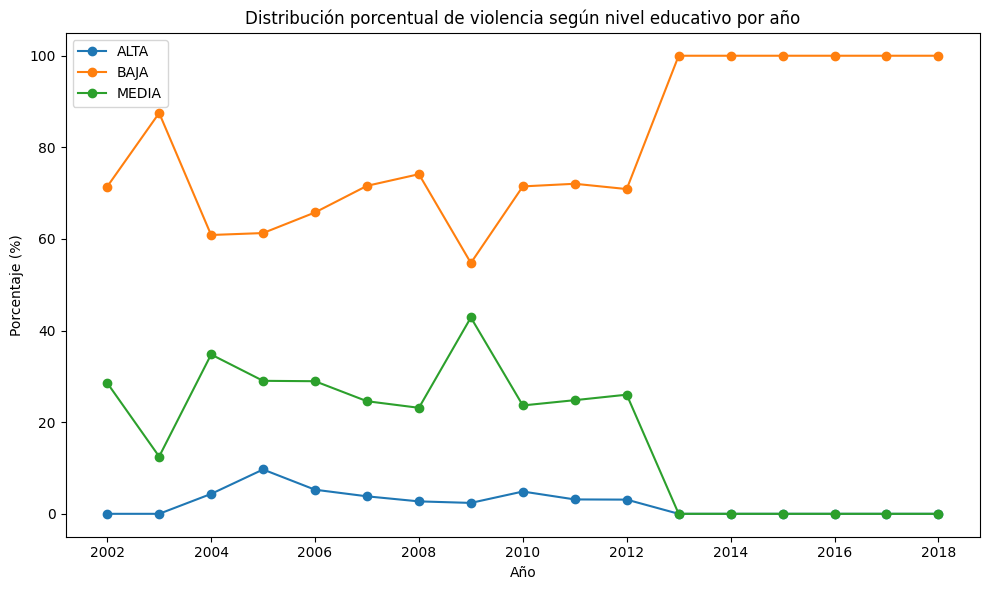

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

for col in tabla_anual.columns:
    plt.plot(tabla_anual.index, tabla_anual[col], marker='o', label=col)

plt.title("Distribución porcentual de violencia según nivel educativo por año")
plt.ylabel("Porcentaje (%)")
plt.xlabel("Año")
plt.legend()
plt.tight_layout()
plt.show()


In [36]:
violencia_anual = df["ANO"].value_counts().sort_index()
print(violencia_anual)

tabla_predominante = (
    df
    .groupby(["ANO", "ESC_GRUPO"])
    .size()
    .reset_index(name="CASOS")
)

idx = tabla_predominante.groupby("ANO")["CASOS"].idxmax()
predominante = tabla_predominante.loc[idx]

print(predominante)

tabla_anual_pct = pd.crosstab(
    df["ANO"],
    df["ESC_GRUPO"],
    normalize="index"
) * 100


ANO
2002.0       20
2003.0       17
2004.0       37
2005.0       46
2006.0       65
2007.0      474
2008.0    23024
2009.0      492
2010.0    31732
2011.0    32999
2012.0    34920
2013.0      656
2014.0    33501
2015.0    31197
2016.0    30689
2017.0    29791
2018.0    29190
Name: count, dtype: int64
       ANO ESC_GRUPO  CASOS
0   2002.0      BAJA      5
2   2003.0      BAJA      7
5   2004.0      BAJA     14
8   2005.0      BAJA     19
11  2006.0      BAJA     25
14  2007.0      BAJA    300
17  2008.0      BAJA  15535
20  2009.0      BAJA     23
23  2010.0      BAJA    426
26  2011.0      BAJA  21702
29  2012.0      BAJA  22462
31  2013.0      BAJA    132
32  2014.0      BAJA   7328
33  2015.0      BAJA   6371
34  2016.0      BAJA   5931
35  2017.0      BAJA   5611
36  2018.0      BAJA   5135


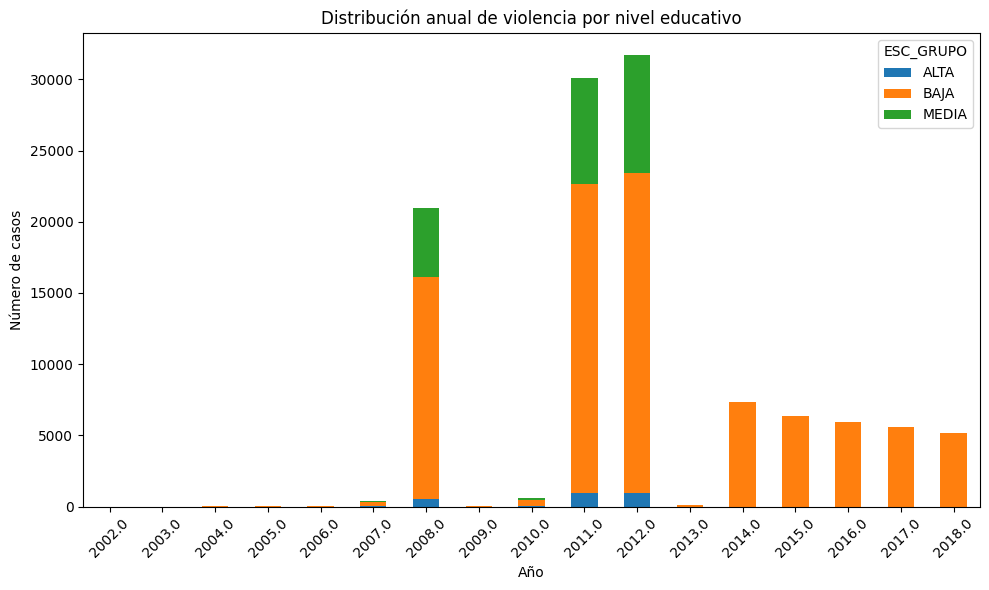

In [38]:
tabla_anual_abs = pd.crosstab(
    df["ANO"],
    df["ESC_GRUPO"]
)

tabla_anual_abs.plot(kind="bar", stacked=True, figsize=(10,6))

plt.title("Distribución anual de violencia por nivel educativo")
plt.ylabel("Número de casos")
plt.xlabel("Año")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


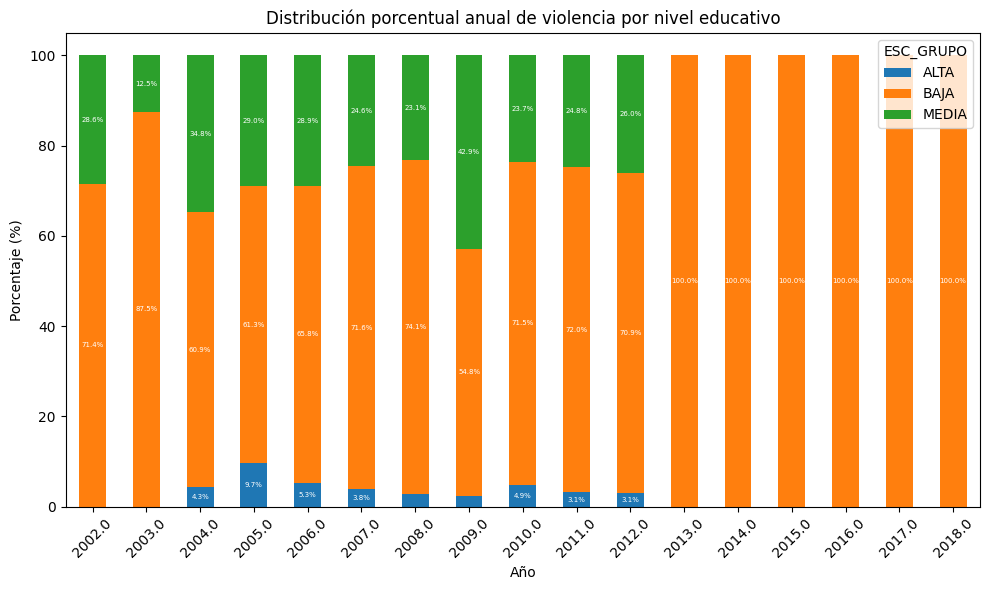

In [40]:
fig, ax = plt.subplots(figsize=(10,6))

tabla_anual_pct.plot(
    kind="bar",
    stacked=True,
    ax=ax
)

plt.title("Distribución porcentual anual de violencia por nivel educativo")
plt.ylabel("Porcentaje (%)")
plt.xlabel("Año")
plt.xticks(rotation=45)
plt.tight_layout()

for i, year in enumerate(tabla_anual_pct.index):
    acumulado = 0
    for grupo in tabla_anual_pct.columns:
        valor = tabla_anual_pct.loc[year, grupo]
        if valor > 3:  # evitar etiquetas en segmentos muy pequeños
            ax.text(
                i,
                acumulado + valor/2,
                f"{valor:.1f}%",
                ha="center",
                va="center",
                fontsize=5,
                color="white"
            )
        acumulado += valor

plt.show()
